# Introductory Tutorials 1 and 2

### Our goals 
* Introduce you to basic operations and packages in Python 
    * Tutorial 1
    
* Illustrate main steps of data analysis in Python 
    * Tutorial 2: working on a specific research question. 'Full cycle': getting and downloading the data, aggregating and merging the datasets, cleaning the data, and running regressions
    
* Provide a reference for you with useful operations and functions (to check and to deepen when you need)
    * Tutorial 1: basic data structures, loops, functions, lambda functions, control flow, etc.
    * Tutorial 2.1: tools to work with big datasets using SQL; tools to clean and prepare your dataset 
    * Tutorial 2.2: potentially useful data sources on Google Cloud 

### Not our goal
* To teach you everyting in Python 
* To make you memorize commands and be able to code from scratch 

# Lecture 1. Model Regularization 

by Nadzeya Laurentsyeva @ nadzeya.laurentsyeva@econ.lmu.de


In [22]:
# Packages to import 
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split

import statsmodels.api as sm 

# Introduction 

### Machine learning - the study of <font color='blue'>_data-modelling algorithms_</font> that improve when new data arrive.


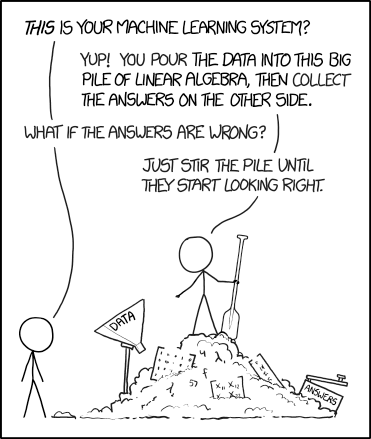
Source: https://xkcd.com/1838/



## Algorithmic Models in Machine Learning vs. Standard Econometrics

_There are two cultures in the use of statistical modeling to reach conclusions
from data. One assumes that the data are generated by a given stochastic data
model. The other uses algorithmic models  and treats the data mechanism as
unknown._ Leo Breiman (2001).

**Differences between approaches in machine learning and standard econometrics**

||Econometrics|Machine learning|
|------|------|------|
|_Modelling_     |Underlying model     |Let the data speak    |
|_Goal_    |(Causal) parameters, statistical inference      |Prediction     |
|_Evaluation_    |Formal properties: consistency, normality, efficiency     | Working properties, computation and optimization     |


## Motivation 

Why in Economics: Machine Learning methods can diversify and enhance our set of tools

Applications:
* Prediction might be of interest, e.g. time-series analysis, choosing the best instrument
* Model specification: control selection, functional form 
* Working with new datasets, e.g. unstructured data, high-dimensional data 
* Heterogeneity analysis
* Experimental design  

Recommended reading: Athey and Imbens (2019) "_Machine Learning Methods Economists Should Know About_"

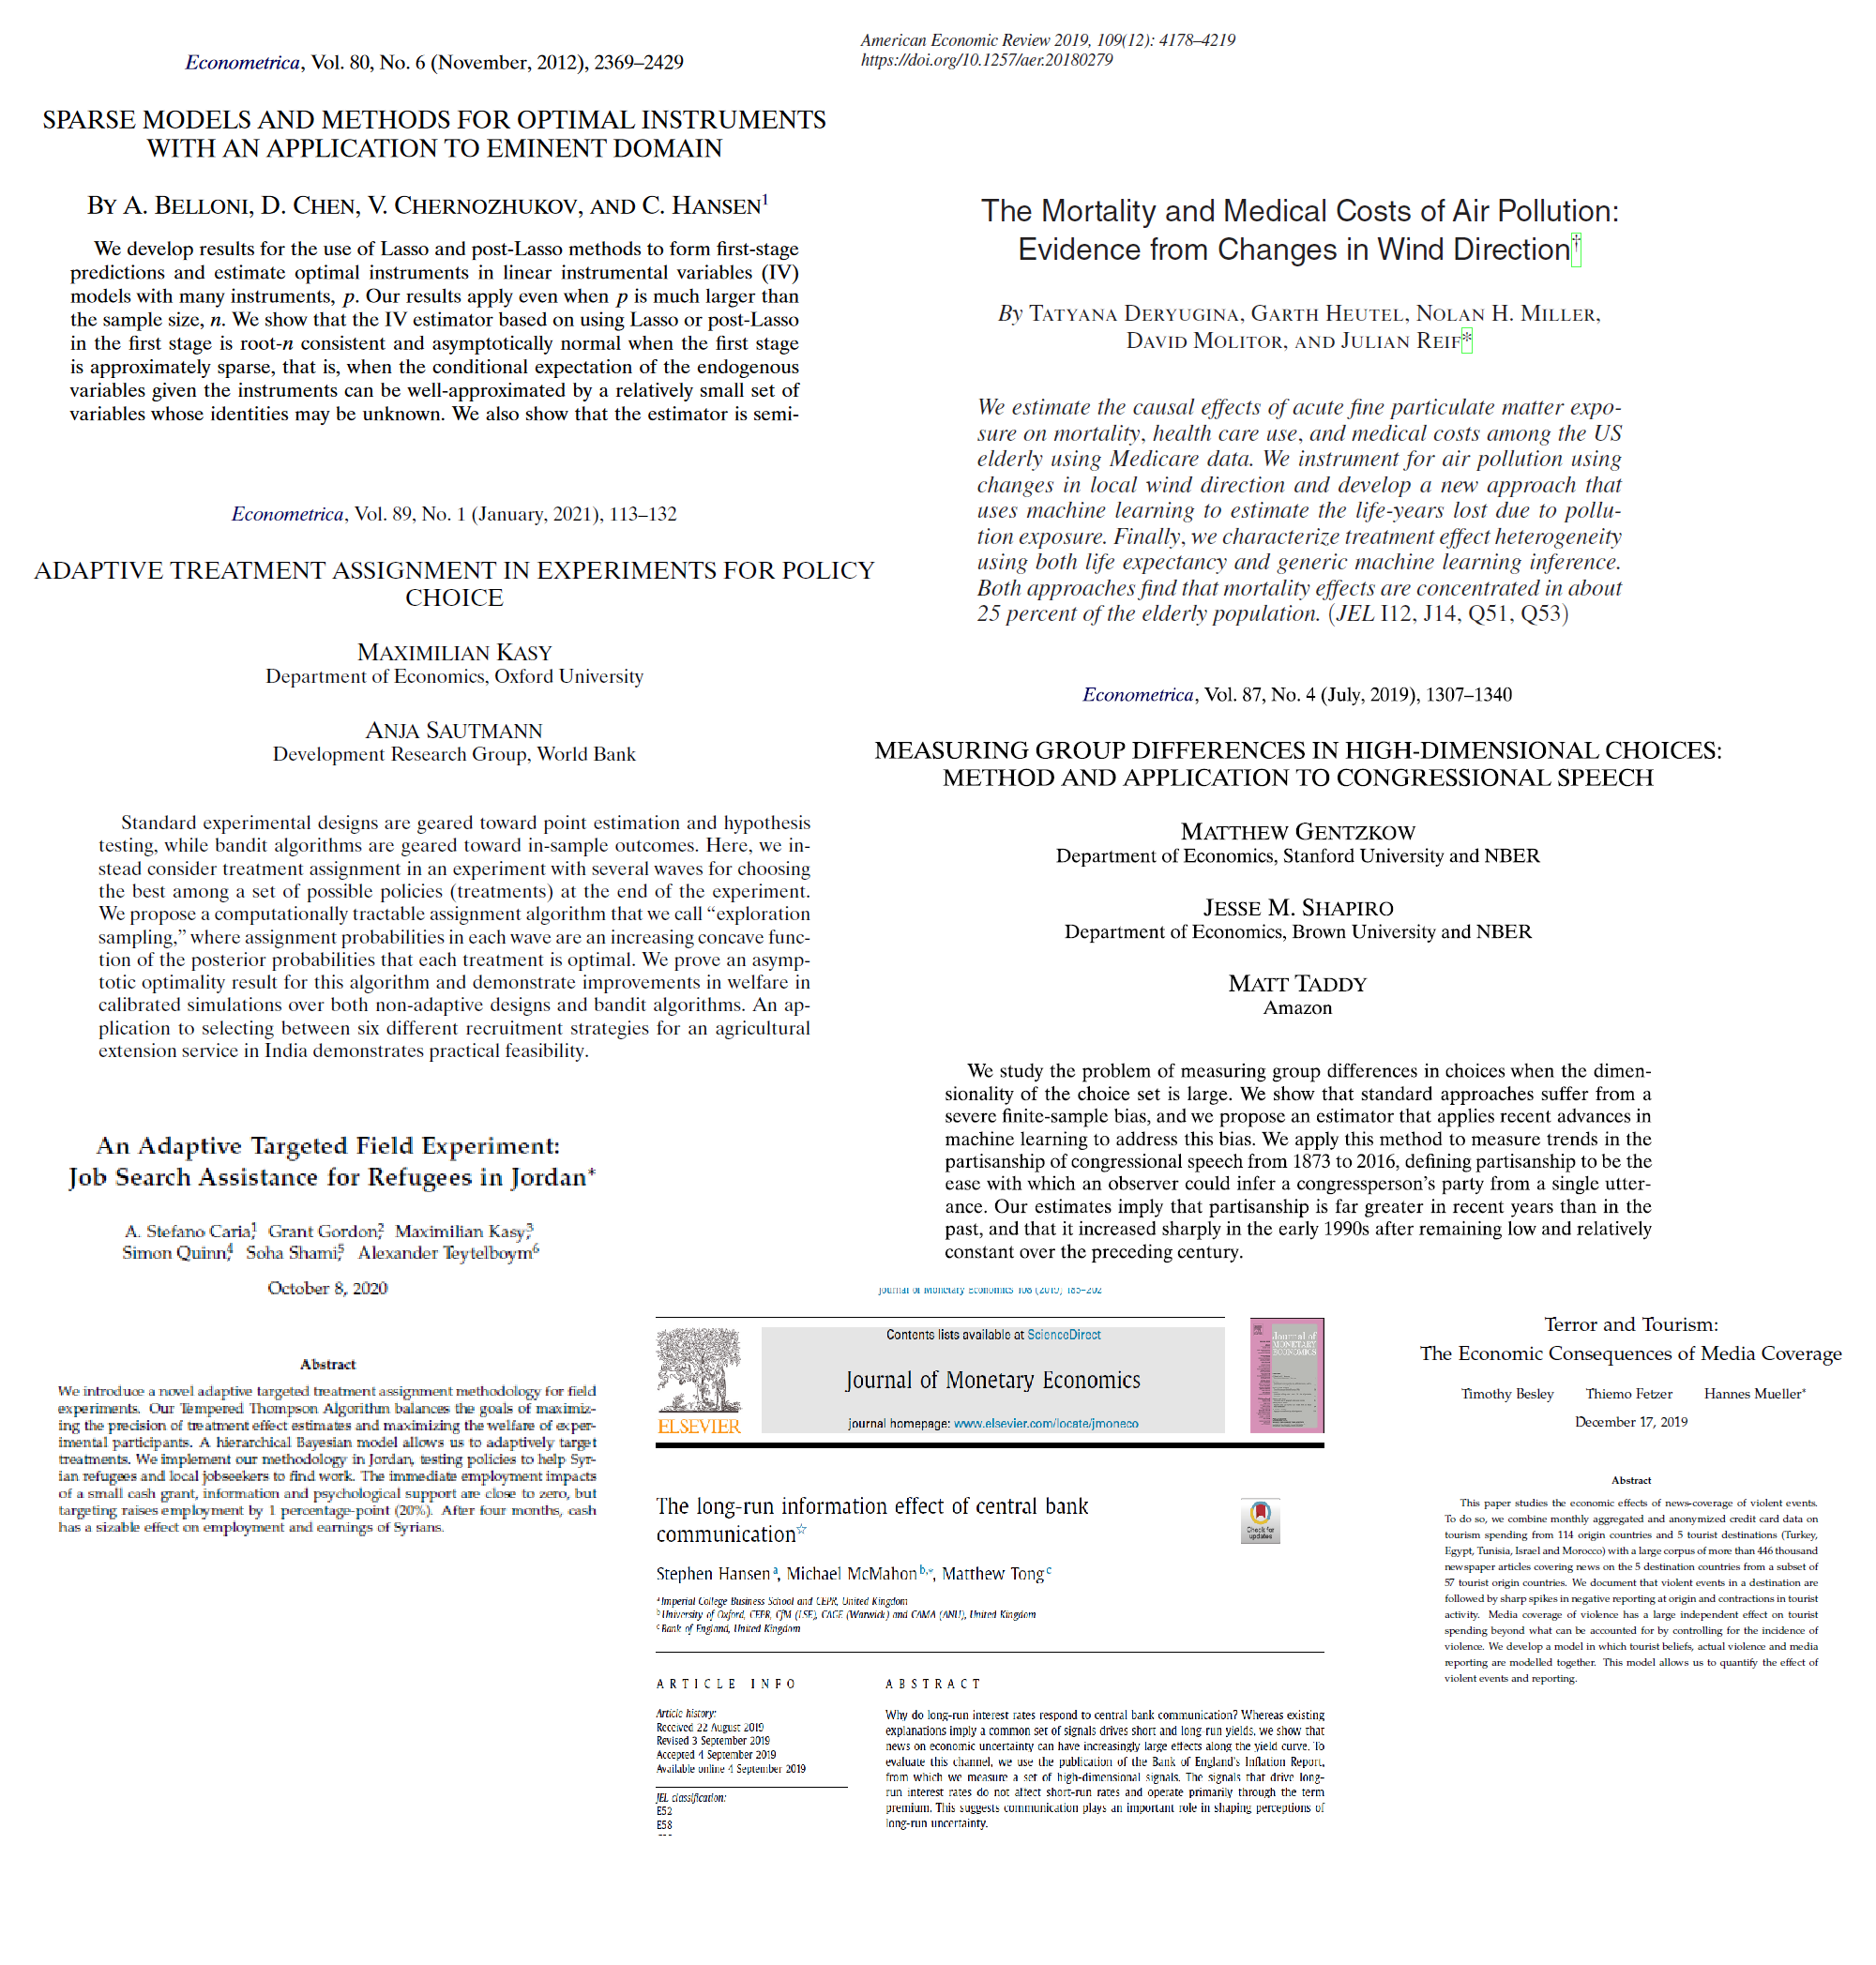

## This lecture

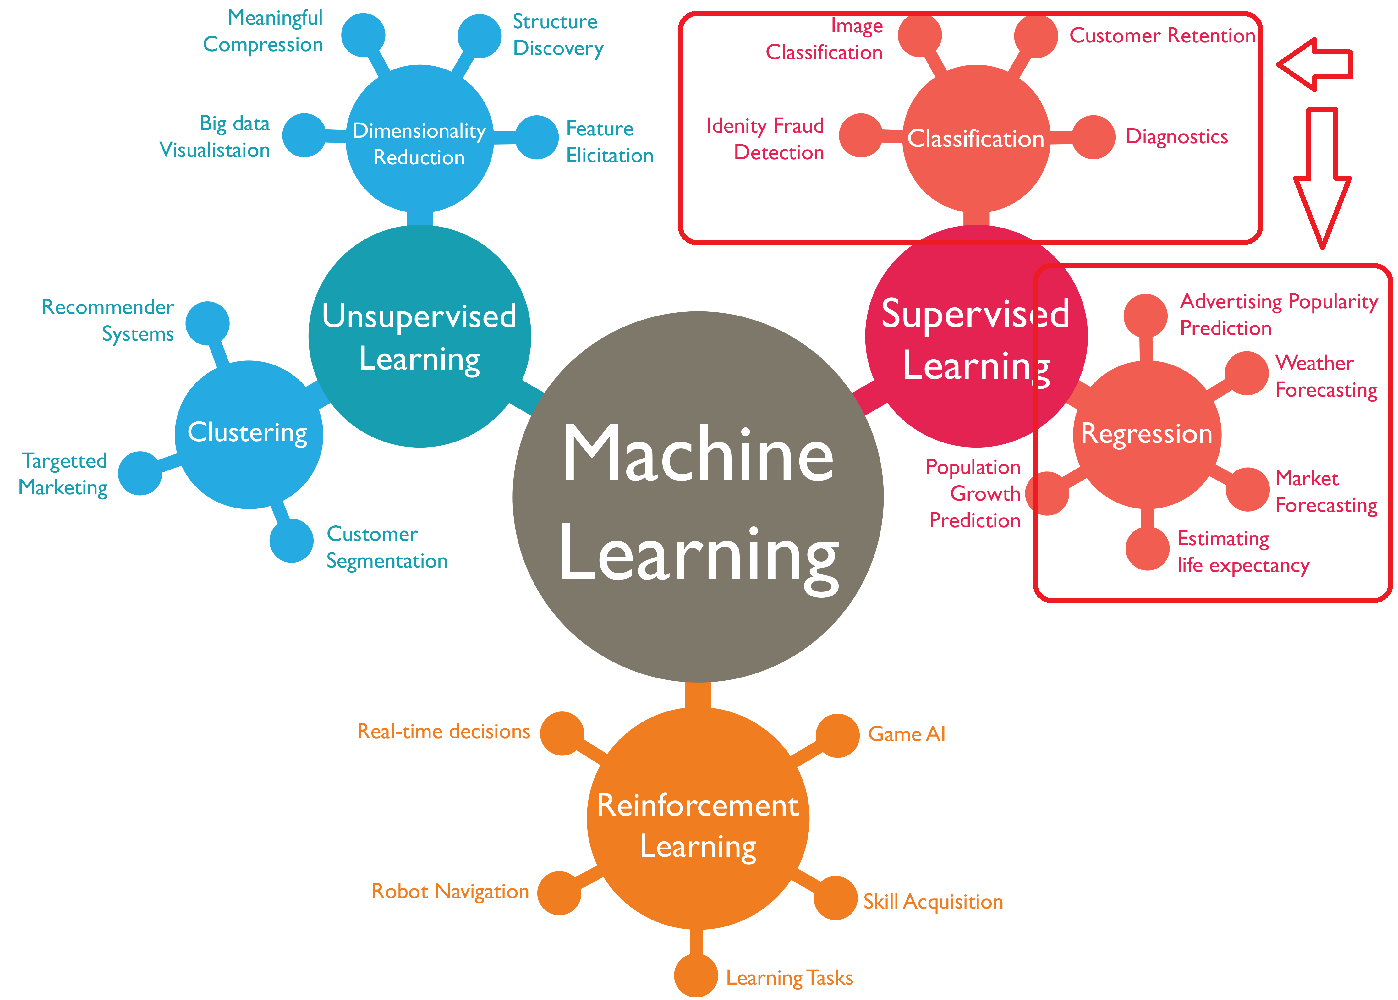
Source: https://towardsdatascience.com/machine-learning-types-2-c1291d4f04b1

## This lecture 

* Principles, and features of the Machine Learning approach to supervised learning problems
<br>

* Evaluation of an algorithm
<br>

* Model regularization 
<br>

* ML tools and causal inference
    * Control selection 

##     What should you be able to do after this lecture? 
* Tell the difference between approaches in ML and Econometrics
<br>

* Understand basic ML 'slang'
<br>

* Explain the bias-variance tradeoff
<br>

* Use python to train and evaluate performance of different algorithms (or at least know where to start)
    * simple OLS 
    * lasso, rigde, elastic nets
    * sample splitting, cross-validation
<br>


* Use ML for control selection 
    * post-double selection lasso
    * double orthogonalization 

## Tools and data for the lecture and the problem set

**Tools** 
* Python (scikit-learn) and Stata packages (pdslasso)
<br>

**Datasets** 
* Model regularisation 
    * Trump's tweet data 
* Control selection 
    * Donohue and Levitt's data on abortion and crime used by Belloni et al. (2014) [Inference on Treatment Effects after Selection among High-Dimensional Controls](https://academic-oup-com.emedien.ub.uni-muenchen.de/restud/article/81/2/608/1523757)

All the datasets can be downloaded on dropbox. 

# 1. Principles and features of the ML approach to supervised learning problems


## Set-up and terminololgy 


**Supervised Learning Problem** 

Estimate the conditional mean of a scalar outcome given a set of covariates (aka features). Let
$Y_i$ denote the outcome for unit $i$, and let $X_i$ denote the $K$-component vector of covariates. The conditional expectation: $ g(x) = E(Y_i | X_i = x) $. Our task is to estimate $g(\cdot)$. 

**Key terms**

* Target $==$ outcome, dependent variable
* Features $==$ regressors, covariates, or predictors
* Weights $==$ sometimes, regression parameters, coefficients
* Parameter of interest $==$ main independent variable
* Nuisance features/parameters $==$ controls
* Likelihood $==$ probability of data given parameters, we want it to be as big as possible
* Deviance (mirror of likelihood) $==$ measure of the distance between data and fit, cost to be minimized
* Training sample $==$ the sample used to estimate the parameters
* Validation sample $==$ the sample used to estimate tuning (or hyper) parameters 
* Test sample $==$ the sample used to evaluate the model's performance

## Supervised learning methods

* Parametric - think of a familiar regression analysis (today)

* Non-parametric:
    Random forests and causal trees 

* Semi-parametric:
    Deep-learning and neural nets 



## Goals
* Make predictions about some variables given others
* Focus on developing efficient algorithms to solve these problems, mostly no presumption that the conditional distribution of the outcomes given the covariates follows a particular model

_Compare with the econometric analysis where the target is to recover a causal or structural parameter of a certain model_. 


## Principles
* Sparsity 
    * Assumption that only a limited number of features are relevant for the outcome, however rather than taking these features from the outside (e.g. economic theory), use data to select them.
    
 
* Validation and cross-validation with _out-of-sample_ tests 
    * _When you apply your models for prediction and decision-making, you don't actually care about the in-sample fit. All that matters is the out-of-sample fit or how easy your model fits new data._ (Matt Taddy) 

# 2. Evaluating an algorithm

* Which data should be used for evaluation? 

<br> 

* What is the metric? 

<br>


* How to use the data at hand for evaluation? 
    * sample splitting
    * cross-validation 



## 2.1 Which data should be used for evaluation? 


* When comparing models on the dataset they were fitted on, the more complex model usually wins
<br>

* If they are nested, the more complex model always wins (e.g. $f(x)=wx+b$ always achieves a better fit than $f(x)=b$)
<br>

* However, the most complex model does not always achieve a sensible fit on new data - it can overfit (capture noise in addition to the true signals)
<br>

* If our goal is prediction, what matters is the performance on unseen data



## 2.2 Metric: Generalization Error / Average Test Error


* We are interested in the performance on unseen data from the distribution $p(x,y)$

<br>

* Generalization error:

$$\begin{equation*} \mathbb{E}[L(y, f(x)] = \int L(y, f(x))p(x,y)dx dy \end{equation*}$$

$L$ being the loss function, $f(x)$ the model and $p(x,y)$ the data distribution

In most cases, we don't have the full distribution $p(x,y)$, so we estimate it using the average test error by considering M observations:
$$\begin{equation*} \frac{1}{M}\sum_{i=1}^{M}L(y_i, f(x_i)), x_i, y_i \sim p(x,y) \end{equation*}$$

E.g. if 
$ L(y_i, f(x_i)) = (y_i - f(x_i))^2$ (residual sum of squares) we are speaking about a mean squared (prediction) error. 


## Note

### Relationship with the coefficient of determination $R^2$ 

 $R^2 = 1 - \dfrac{RSS}{TSS}$, where
 * $TSS$ - total sum of squares $\sum_i(y_i - \bar{y})^2$, proportional to the variance of the data; $\hat{y_i} = \bar{y}$ is also called a _null_ model. 
 * $RSS$ - residual sum of squares after fitting a model $\hat{y_i} = f(x_i)$: $\sum_i(y_i - f(x_i))^2$. $R^2$ is often used as an alternative performance metrics of an algorithm. 

 
### Relationship with deviance 

You might also meet a term _deviance_ - a function that measures the distance between data and fit and is a _generalization_ of squared-errors for more flexible modeling (e.g. logistic regression), where model-fitting is achieved by maximum likelihood. 

$Deviance = -2log(Likelihood) + C$ = -2 times the difference between log likelihoods for a fitted model and for a fully saturated (explains every data point) model. 

In the case of a linear regression, deviance is proportional to the residual sum of squares. 

## Examples: The importance of measuring performance out of sample when evaluating algorithms

When comparing models on the dataset they were fitted on, the more complex model usually wins. 

Two problems may arise 

* Overfitting: the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit out-of-sample data 
<br>

<font color='gray'>

* Multiplicity: assume we have 100 covariates and 5 of them have real relationship with the outcome; the rest are noise. We manage to find all 5 true ones and test the remaining 95 with an $ \alpha = 0.05 $ significance cutoff. We can expect that $5\% (\sim 5)$ out of 95 remaining coefficients will turn out significant: Our false discovery rate (FDR) will be then $ \dfrac{N\ false\  positives}{N\  significant\  tests} = 5/10 = 50\% $. 
    </font>
<br>

Why is it bad: we add noise to the model and reduce the quality of the predictors 

### Example: Risk of Overfitting
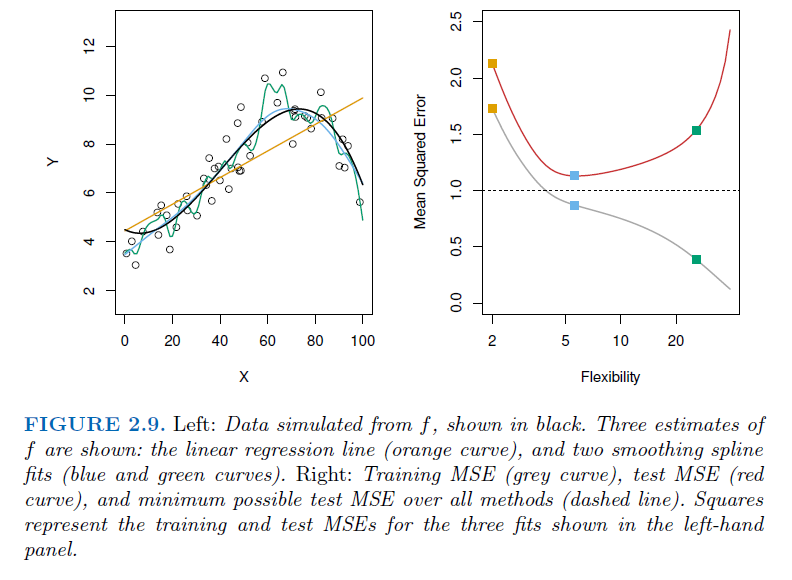

Source: James/Witten/Hastie/Tibrashini (2021) _Introduction to Statistical Learning_ (Chapter 2.2) https://web.stanford.edu/~hastie/ISLR2/ISLRv2_website.pdf

## Examples: The importance of measuring performance out of sample when evaluating algorithms


When comparing models on the dataset they were fitted on, the more complex model usually wins. 

Two problems may arise 
<font color='gray'>
* Overfitting: the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit out-of-sample data 
<br>
    </font>


* Multiplicity: assume we have 100 covariates and 5 of them have real relationship with the outcome; the rest are noise. We manage to find all 5 true ones and test the remaining 95 with an $ \alpha = 0.05 $ significance cutoff. We can expect that $5\% (\sim 5)$ out of 95 remaining coefficients will turn out significant: Our false discovery rate (FDR) will be then $ \dfrac{N\ false\  positives}{N\  significant\  tests} = 5/10 = 50\% $. 

<br>

Why is it bad: we add noise to the model and reduce the quality of the predictors 
<br>


### Example: Risk of multiplicity

Assume the following data generation process: 
    $ y = 0.5x_1 + 67x_2 -1/3x_3 + 0.5x_4 - 40x_5 +\epsilon  $

where $E(\epsilon) = 0$ and $Var(\epsilon)$ = $\sigma^2$. 

In [23]:
# we generate the data using random number generation 

np.random.seed(25) # for replications
n = 200 # number of observations
col = 100 #number of parameters X
df = pd.DataFrame(data = np.random.normal(0, 10, (n, col))) #mean, st. deviation, shape of the output
df.columns = ['x'+str(x) for x in list(range(1,col+1))] #naming columns

df['e'] = np.random.normal(0, 70,(n, 1)) #adding error term

df['y'] = 0.5*df['x1'] + 67*df['x2']-1/3*df['x3'] + 0.5*df['x4'] - 40*df['x5'] + df['e'] #adding y

df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x93,x94,x95,x96,x97,x98,x99,x100,e,y
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,-0.002653,-0.000769,-0.000543,-0.009430,-0.014855,-0.010209,-0.001155,0.001120,0.002732,-0.000159,...,0.003568,0.010804,-0.005221,0.009437,-0.002778,-0.010227,0.009118,-0.009643,-0.191349,0.345494
std,1.002294,1.000621,1.001563,1.003523,0.993385,1.002546,0.994361,1.004171,0.999140,0.997021,...,0.997857,1.006047,0.997565,1.001859,0.995898,0.994552,0.992105,1.005657,69.766140,104.498229
min,-4.044481,-3.750158,-4.077852,-3.874336,-3.726591,-4.273619,-3.838248,-3.912966,-3.976267,-4.268081,...,-3.907449,-3.689975,-4.233585,-4.453469,-3.929423,-3.740260,-4.181797,-3.788831,-279.647835,-433.987288
25%,-0.680095,-0.668608,-0.679086,-0.680681,-0.683318,-0.683682,-0.669202,-0.675193,-0.675354,-0.677099,...,-0.669917,-0.657817,-0.679806,-0.668811,-0.678496,-0.678234,-0.661286,-0.680344,-46.972859,-70.036083
50%,-0.005962,-0.012724,-0.004645,-0.011500,-0.009322,-0.006346,0.001701,0.005562,0.000748,-0.001534,...,0.013810,0.016388,-0.003194,-0.000957,0.005215,-0.006324,0.009211,-0.011524,-0.770607,0.385726
75%,0.670925,0.670822,0.671601,0.664608,0.653451,0.668723,0.675425,0.668374,0.673077,0.669790,...,0.689406,0.689607,0.665962,0.689471,0.669381,0.656157,0.674032,0.661329,47.282088,71.050117
max,3.793080,3.719234,4.080554,3.662245,3.828533,4.007531,3.960126,3.605780,3.681096,4.483901,...,3.862366,4.510114,3.786176,4.384297,3.803701,4.495659,3.952442,4.039180,267.593552,393.724935


In [24]:
# we can fit an OLS model's
X = df.iloc[:,:col] 
y = df.y
X = sm.add_constant(X)

# do the estimation 
est = sm.OLS(y, X, missing='drop').fit()
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     249.9
Date:                Sun, 31 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:29:46   Log-Likelihood:            -1.1323e+05
No. Observations:               20000   AIC:                         2.267e+05
Df Residuals:                   19899   BIC:                         2.275e+05
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2098      0.494     -0.424      0.671      -1.178       0.759
x1             0.3865      0.493      0.784      0.433      -0.580       1.353
x2            66.9617      0.494    135.524      0.000      65.993      67.930
x3            -0.6761      0.493     -1.370      0.171      -1.643       0.291
x4             0.3195      0.493      0.648      0.517      -0.646       1.285
x5           -39.5836      0.497    -79.571      0.000     -40.559     -38.609
x6             0.1238      0.493      0.251      0.802      -0.843       1.091
x7            -0.5869      0.497     -1.180      0.238      -1.561       0.388
x8             0.0404      0.493      0.082      0.935      -0.925       1.006
x9             1.1227      0.495      2.268      0.023       0.153       2.093
x10            0.2531      0.496      0.511      0.610      -0.719       1.225
x11            0.2387      0.494      0.483      0.629      -0.730       1.208
x12           -0.1615      0.487     -0.331      0.740      -1.117       0.794
x13            0.0890      0.495      0.180      0.857      -0.881       1.059
x14            1.1588      0.494      2.348      0.019       0.191       2.126
x15           -0.3000      0.494     -0.607      0.544      -1.269       0.669
x16            0.2690      0.492      0.546      0.585      -0.696       1.234
x17            0.2503      0.497      0.504      0.614      -0.723       1.224
x18            0.9843      0.493      1.996      0.046       0.018       1.951
x19            0.5264      0.492      1.069      0.285      -0.438       1.491
x20            0.1772      0.496      0.357      0.721      -0.795       1.149
x21           -1.1290      0.499     -2.262      0.024      -2.107      -0.151
x22            0.1570      0.491      0.319      0.749      -0.806       1.120
x23           -0.3359      0.491     -0.684      0.494      -1.298       0.626
x24            0.6424      0.494      1.299      0.194      -0.327       1.612
x25            0.1030      0.493      0.209      0.835      -0.864       1.070
x26           -0.0285      0.493     -0.058      0.954      -0.994       0.937
x27            0.1507      0.494      0.305      0.760      -0.817       1.119
x28           -1.2335      0.494     -2.499      0.012      -2.201      -0.266
x29            0.5180      0.494      1.049      0.294      -0.450       1.486
x30            0.7039      0.496      1.419      0.156      -0.268       1.676
x31            0.2403      0.496      0.485      0.628      -0.732       1.212
x32            0.1259      0.494      0.255      0.799      -0.842       1.094
x33           -0.1070      0.495     -0.216      0.829      -1.077       0.863
x34            0.5026      0.493      1.019      0.308      -0.464       1.469
x35           -0.1880      0.492     -0.382      0.702      -1.153       0.777
x3

In [25]:
# rank coefficients by their p-values
sorted = pd.Series(est.pvalues).sort_values(axis=0, ascending=True)

sorted.loc[sorted<0.05]

x2     0.000000
x5     0.000000
x73    0.008613
x96    0.010499
x28    0.012455
x36    0.016478
x14    0.018904
x9     0.023314
x21    0.023724
x98    0.025783
x78    0.031543
x18    0.045906
dtype: float64

<AxesSubplot:title={'center':'Ordered p-values'}, xlabel='Coefficients ranked by p-value', ylabel='P-value'>

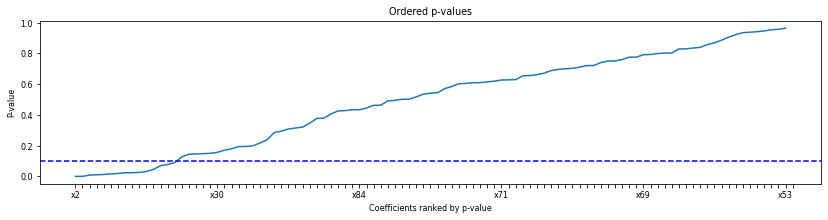

In [26]:
# plotting fitted p-values
# to show that more than five variables have significant coefficients 
matplotlib.rcParams.update({'font.size': 8, 'figure.figsize': (14, 3)})
ax = sorted.plot.line(title = "Ordered p-values")
ax.set(xlabel="Coefficients ranked by p-value", ylabel="P-value")
ax.set_xticks(np.arange(0, len(sorted)+1, 1))
ax.axhline(0.1, color='b', linestyle='--', label = 'p-value = 0.1')
ax



## 2.3a Splitting the dataset to evaluate an algorithm

* One approach to calculate the average test error is to split the dataset into a training set and a test set
<br>

* The training set is used to fit the model, while the test set is only used for model evaluation
<br>

* When tuning (hyper) parameters are present (such as the regularization term in penalised regressions, which you will see soon), one can split the dataset into three folds: training, validation and test set
<br>

* The validation set can then be used to find the best tuning parameters
<br>

* Since we want to use as much training data as possible, a common split is $80\%/10\%/10\%$ for training/validation/test
<br>

* For anything that you do with the data (e.g. standardisation, interpolation, feature selection), do it separately on the train and test datasets to get an accurate assessment of the model's performance. 
<br>

* On a relatively small dataset, cross-validation is another option to select the tuning parameters and to approximate the average test error


### Exercise: Splitting the dataset and evaluating an algorithm

* First look at the scikit-learn package 
    
        * train_test_split - to split the data
        * LinearRegression - to fit linear regression and do predictions
        * mean_squared_error, r2_score - to evaluate an algorithm
        
Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#examples-using-sklearn-linear-model-linearregression


<img src="ml_map.png" style="height:600px">

Source: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html 

In [27]:
# we use the same dataset that we just generated

# define x and y
y = df['y'] 
X = df.iloc[:, 0:col]

# split the data in train and test
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) # in real applications, try to use as much training data as possible - 80%/20% or 90%/10%

# define the model
regr = LinearRegression(fit_intercept = True, normalize=False, copy_X=False, n_jobs=-1) # if we use defaults, the option can be skipped

# estimate the model on the training dataset = train the model in ML slang
regr.fit(X_train, y_train)

print('All 100 covariates')
print('In-sample Rsq: %.3f' %regr.score(X_train, y_train))

#alternatively: 
y_pred_in = regr.predict(X_train)
# The mean squared error
print('Mean squared error in-sample: %.3f'
      % mean_squared_error(y_train, y_pred_in))
# In-sample R-sq. (just to show that there is another way to obtain R2)
print('In-sample Rsq in-sample: %.3f'
      % r2_score(y_train, y_pred_in))


y_pred = regr.predict(X_test)
print('Out-of-sample Rsq: %.3f' %regr.score(X_test, y_test))
print('Mean squared error out-of-sample: %.3f'
      % mean_squared_error(y_test, y_pred))

# a shorter model only with the relevant covariates
X = df.iloc[:, 0:6]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) # in real applications, try to use as much training data as possible - 80%/20% or 90%/10%

regr = LinearRegression(fit_intercept = True, normalize=False, copy_X=False, n_jobs=-1) # if we use defaults, the option can be skipped
regr.fit(X_train, y_train)

print('\n \n Five only covariates')
print('In-sample Rsq: %.3f' %regr.score(X_train, y_train))
y_pred_in = regr.predict(X_train)
# The mean squared error
print('Mean squared error in-sample: %.3f'
      % mean_squared_error(y_train, y_pred_in))


y_pred = regr.predict(X_test)
print('Out-of-sample Rsq: %.3f' %regr.score(X_test, y_test))
print('Mean squared error out-of-sample: %.3f'
      % mean_squared_error(y_test, y_pred))


All 100 covariates
In-sample Rsq: 0.557
Mean squared error in-sample: 4827.450
In-sample Rsq in-sample: 0.557
Out-of-sample Rsq: 0.548
Mean squared error out-of-sample: 4985.511

 
 Five only covariates
In-sample Rsq: 0.555
Mean squared error in-sample: 4855.403
Out-of-sample Rsq: 0.549
Mean squared error out-of-sample: 4971.207


## 2.3b K-fold out-of-sample (cross-)validation

* Common way to test the validity of a model, find hyperparameters, and to compare the performance of different models
<br>

* Given a dataset of $N$ observations: 
    * Split the data into $K$ evenly sized random subsets (folds)
    * For k = 1...K: 
        * Fit the coefficients $\hat{\beta}$ using all but the $k^{th}$ fold of data 
        * Record $R^2$ (or other relevant metric) on the left-out $k^{th}$ fold 
        * Note: again for anything that you do to the data (e.g. standardisation, interpolation, feature selection), do it without the left-out fold to get an accurate assessment of the model's performance. 
<br>

* This will yield a sample of $K$ out-of-sample $R^2$ (other metric) values. This sample is an estimate of the distribution of the model's predictive performance on new data. 
<br>

* Question: can you theoretically get negative $R^2$ for out-of-sample tests of linear regressions? 


* Yes: Consider a linear regression, with $R^2 = 1 - \dfrac{RSS}{TSS}$, where $TSS$ - total sum of squares, corresponds to the deviance of a null model $\sum_i(y_i - \bar{y})^2$ and $RSS$ - residual sum of squares after fitting the model. We can see that the negative result will occur if the model performs worse than the null model.

### Exercise: Evaluating an algorithm with K-fold cross-validation

    Scikit-learn package

      * train_test_split - to split the data
      * LinearRegression - to fit linear regression and do predictions
      * mean_squared_error, r2_score - to evaluate an algorithm
      * KFold https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
      * cross_val_score



In [28]:
# Back to our exercise and data
# Performing cross-validation to proxy performance of our data on new dataset

# define x and y
y = df['y'] 
X = df.iloc[:, 0:col]

# define the KF
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# define the model
regr = LinearRegression(fit_intercept = True, normalize=False, copy_X=False, n_jobs=-1) # if we use defaults, the option can be skipped

scores_full = cross_val_score(regr, X, y, cv=kf)
print(scores_full)
print("Accuracy, All 100 covariates: %0.5f (+/- %0.5f)" % (scores_full.mean(), scores_full.std() * 2))

# define the model, only five
X = df.iloc[:, 0:6]
regr = LinearRegression(fit_intercept = True, normalize=False, copy_X=False, n_jobs=-1) # if we use defaults, the option can be skipped

scores_reduced = cross_val_score(regr, X, y, cv=kf)
print(scores_reduced)
print("Accuracy, Only 5 covariates: %0.5f (+/- %0.5f)" % (scores_reduced.mean(), scores_reduced.std() * 2))

[0.56195823 0.53856176 0.54425487 0.5653255  0.54759984]
Accuracy, All 100 covariates: 0.55154 (+/- 0.02070)
[0.5636183  0.54104981 0.54800511 0.56721791 0.54968208]
Accuracy, Only 5 covariates: 0.55391 (+/- 0.01979)


Text(0.5, 1.0, 'Out-of-sample validation')

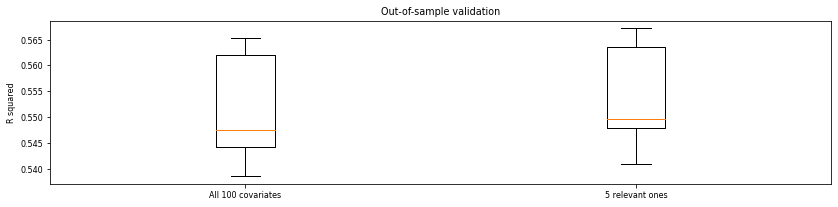

In [29]:
# adding a graph to illustrate the results

fig, ax = plt.subplots()
ax.boxplot([scores_full, scores_reduced])
plt.xticks([1, 2], ['All 100 covariates', '5 relevant ones'])
plt.ylabel('R squared')
plt.title('Out-of-sample validation')

# 3 Model regularization 

* Bias-Variance Trade-off 

<br>

* Overview of possible solutions 
    * Setting an acceptable False Discovery Rate (Benjamini-Hochberg algorithm)
    * Subset Selection 
    * Model penalization (or Shrinkage methods)

## 3.1 Bias-Variance Trade-off


Consider a model $y_i = f(x_i) + \epsilon_i$ where:

* $Var(\epsilon_i) = \sigma^2$
* $E(\epsilon_i) = 0$
* $\epsilon_i$ are independent across $i$
* $\epsilon_i$ and $x_i$ are independent

Suppose we fit a mapping $\hat{f}$ from a sample $D$ and use it to predict a value for $y_0$ at some $x_0$.

The mean square error of prediction is $E[(y_0-\hat{f}(x_0))^2]$. Note: the randomness is generated by data $D$ we used to fit $\hat{f}$.

MSE can be further decomposed in: $MSE = \sigma^2 + Variance(\hat{f}(x_0)) + Bias(\hat{f}(x_0))^2$
(see derivation on the next page). 

Adding _relevant_ variables to a regression reduces bias. Adding _any_ variable to a regression will increase variance of each estimated coefficient. 

With many covariates, OLS is unbiased but has high variance. 

Idea behind regularized regression: reduce model complexity and hence variance at the cost of introducing (small) bias into coefficient estimates

**Illustration**

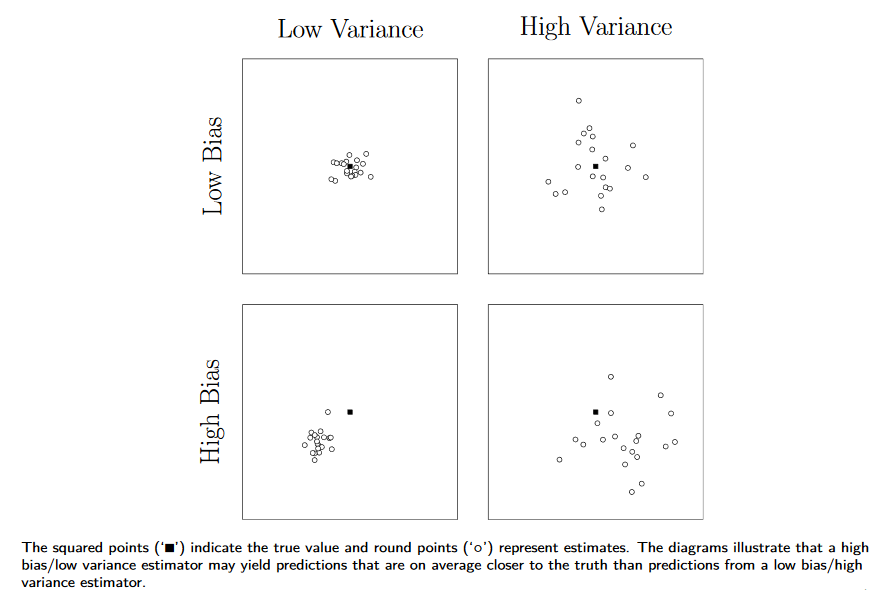


[Source](https://www.stata.com/meeting/uk18/slides/uk18_Ahrens.pdf)

**Derivation of the bias-variance decomposition**

$MSE = E[(y_0-\hat{f}(x_0))^2]$

To simplify notation, set $y_0 = y, f(x_0) = f, \hat{f}(x_0) = \hat{f}$. 
Note, that $E(f) = f$, as $f$ (true model) is deterministic (doesn't depend on $D$). 

Also note that for a random variable $X$, $Variance(X) = E[(X-E(X))^2] = E[X^2] - E[X]^2$

$E[(y-\hat{f})^2] = E[y^2 + \hat{f}^2 - 2y\hat{f}] = E[(f+\epsilon)^2] + E[\hat{f}^2]-2E[(f+\epsilon)\hat{f}] = $  

$= \sigma^2 + f^2 + E[\hat{f}^2] - 2fE(\hat{f})$ now, let's substract and add $E[\hat{f}]^2$. 

$ MSE = \sigma^2 + E[\hat{f}^2] - E[\hat{f}]^2 + E[\hat{f}]^2 - 2fE(\hat{f}) + f^2 = \sigma^2 + E[\hat{f}^2] - E[\hat{f}]^2 + (E[\hat{f}] - f)^2 $ 

where: $Variance(\hat{f}) = E[\hat{f}^2] - E[\hat{f}]^2$ and $Bias(\hat{f}) = E[\hat{f}] - f$


## Why is 'just' a regression not enough? 
Consider a familiar linear regression, which is a simple supervised learning model. Here we choose a vector of coefficients $\beta$ to minimise: 

$ RSS(\beta) = \sum_i (y_i-x_i^T\beta)^2 $

and the solution $\hat{\beta^{OLS}} = (X^TX)^{-1})(X^Ty) $

With $K$ > $N$, the OLS solution is not well defined. With $K$ being large (as in many data science problems), the least squares estimator has poor prediction properties.

* Overfitting

* Multiplicity 

Solution: reduce the model's complexity


## 3.2a Controlling expected false discovery rate
Benjamini-Hochberg (BH) FDR Control Algorithm https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFdr.html
* Allows to fix an acceptable FDR and sets a cut-off for p-values (often much lower than conventional 0.1 or 0.05) to ensure such FDR. 
* Identify covariates with acceptable p-values and re-run the regression  
* Relies on a strong (and often unrealistic) assumption of independence between significance tests, therefore often gives too conservative results. 

## 3.2b Subset selection 

Forward Stepwise Regression - building from simplicity to complexity

* Fit all univariate models. Choose that ($x_u$) with the highest in-sample $R^2$  and put it in your model 
* Fit all bivariate models including $x_u$ and again choose the second variable $x_b$, which generates the best fit
* Repeat by adding the number of covariates in this way until reaching a predetermined level of complexity or stop according to some model selection rule. 

Issues
* Slow
* Instability

## 3.2c Penalised regressions

One common form of regularization is to augment our loss function with a term that directly penalises the complexity (puts a cost on the size of coefficients). For example, in the case of a linear regression, we will then minimise 

$ \sum_i (y_i-x_i^T\beta)^2  + \lambda h(\beta) $ 

Two new terms are: 
* $\lambda > 0$ - defines the strength of the penalty
    * tuning parameter, selected during the estimation  in some data-dependent matter
* $h(\cdot)$ - controls the shape of the penalty, non-decreasing in $\beta$
    * Lasso: $h(\beta) = \sum_k |\beta_k| $
    * Ridge: $h(\beta) = \sum_k (\beta_k)^2 $
    * Elastic net: $h(\beta) = \sum_k |\beta_k| + \gamma \sum_k(\beta_k)^2 $
    * Nonconvex penalty: $h(\beta) = \sum_k (log(1+|\beta|)) $ 
    * Other possible variations 

### Practical tips
* Factor reference levels matter under penalisation => get rid of the reference level (create separate dummies for each factor level)
* Size of the covariates now matters, as all $\beta_k$ are penalised by the same $\lambda$ => several solutions possible: i) standardise covariates; ii) standardise $\beta$'s in the cost function, e.g. by multiplying the coefficients by standard deviation of corresponding covariates. 
* Note: you might still want to avoid standardisation if you have all indicator variables as your covariates. Otherwise, more penalty will be put on a common category (e.g. its standard deviation is higher) and less penality on a rare one. 

### Tuning the regression 

$ \sum_i (y_i-x_i^T\beta)^2  + \lambda h(\beta) $ 

**How to select $h(\cdot)$?** 

* Lasso: $h(\beta) = \sum_k |\beta_k| $
* Ridge: $h(\beta) = \sum_k (\beta_k)^2 $
* Elastic net: $h(\beta) = \sum_k |\beta_k| + \gamma \sum_k(\beta_k)^2 $
* Nonconvex penalty: $h(\beta) = \sum_k (log(1+|\beta|)) $ 


Start by thinking about your covariates and which signals you want to capture. E.g. if you believe that each of  your covariates has a small effect on the outcome, ridge might be appropriate. On the contrary, if you think that there are a few of very important coefficients, a log penalty will generate many zeros but will allow large signals to be estimated with a smaller bias. 

For many applications, Lasso is a good starting point. 
 * Places a constant penalty on deviations from zero
 * Will yield automatic variable screening: some of the coefficients will be exactly equal to zero. It happens when the penalty dominates the loss term (of course, not only Lasso has such property).

### Tuning the regression 

$ \sum_i (y_i-x_i^T\beta)^2  + \lambda h(\beta) $ 

**How to select $\lambda$?** 
* **K-fold cross-validation - CV** 
    * Obtain a path of candidate models (corresponding to different levels of $ \lambda$)
    * Divide data in K folds. For k = 1...K folds:
        * Fit the candidate models using all but the $k^{th}$ fold of data 
        * Calculate the fit of each model for the left-out $k^{th}$ fold
    * Choose the best $\lambda$, e.g. that minimises the average out-of-sample error 
    * Use the corresponding train-sample coefficient estimates for modeling and predictions

### Tuning the regression 

$ \sum_i (y_i-x_i^T\beta)^2  + \lambda h(\beta) $ 

**How to select $\lambda$?** 
* **Information criteria - IC**
    * Another way is to select lambda based on information criteria. These are analytic approximations to the types of out-of-sample errors that cross-validation estimates using a computational experiment. We would then use the model with minimum IC. 
    * There are many variations of ICs (AIC, AICc, BIC, etc.) 
        Ex: $AIC = deviance + 2df$, where $df$ - model's degrees of freedom. Conveniently, in lasso degrees of freedom simply equal to the number of nonzero coefficients at a given $ \lambda$. 
    * What is better IC or CV approach? Depends on your data and computational resources
        * CV can become costly if we work with huge datasets and complex models
        * AIC performs well for high N/df, but overfits in high-dimensional and/or small data. AICc corrects for that and is faster and more stable compared to CV. 
        * BIC penalises model complexity more heavily (uses $log(N)*df$ instead of $2df$) and tends to underfit in large samples

## Exercise: Fitting a Lasso Regression 

* We can work with our generated dataset
* Now let's estimate the model using lasso 
      * Use the full sample to find lasso regularisation path and have a better idea for our candidate models 
      * Use K-fold out-of-sample validation to select the 'best' 𝜆. Plot average out-of-sample 𝑅2 as a function of 𝜆
      * Compare the results with AIC/AICc/BIC criteria.
* Compare out-of-sample performance between OLS and Lasso

Note: in Python Scikit $\lambda$ is denoted by $\alpha$, so try to not be confused 

In [30]:
df[0:col].head()


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x93,x94,x95,x96,x97,x98,x99,x100,e,y
0,0.228273,1.026890,-0.839585,-0.591182,-0.956888,-0.222326,-0.619915,1.837905,-2.053231,0.868583,...,-1.358895,0.498310,-1.147321,-0.536521,-0.916489,-0.212148,0.192844,-0.322683,-29.267395,77.908195
1,-1.727654,0.764067,0.445314,-2.135576,1.020364,-0.587397,0.048037,0.560169,1.424193,-0.003191,...,-1.269709,0.905344,0.737179,-1.260360,1.201543,-0.367450,0.878851,0.844085,60.852060,69.149960
2,1.351855,1.115809,-1.030206,-0.444282,0.057423,-0.562746,0.004501,0.173643,0.970628,1.867282,...,2.061808,-1.546407,0.276935,-0.646731,-0.173810,-0.176011,0.289851,0.024213,-142.352337,-69.092873
3,1.329898,-0.251138,-0.892670,-0.886607,0.023848,-2.151303,0.317010,0.936555,-1.793396,0.407319,...,0.067164,-0.100554,1.066966,0.435700,-1.908924,-0.773551,0.580472,-1.620192,-25.662593,-42.923577
4,-1.567793,-0.972316,1.536337,-1.046018,0.128710,0.780459,0.558835,-0.402247,-1.785758,1.913771,...,-0.706059,-0.416779,1.236913,-0.253807,-0.924209,-0.597519,0.414284,-0.450197,27.540637,-44.571978


### Lasso fitting 

* A model with a 'randomly' selected penalty value ($\lambda$ ~ $\alpha$ in Python)
* Lasso regularisation path
    * Allows us to select a range of possible penalty values for tuning in the next step
* Finding a penalty value, which ensures the best out-of-sample performance 
* Comparison with OLS

### Pipeline, standardisation, simple sample-splitting
We are still doing simple linear regressions, but will now make our workflow more suitable to evaluate the prediction power of the model. 

* We will divide the underlying dataset on training and test data and evaluate the out-of-sample fit
* For Lasso estimations, it is recommended to standardise the covariates and to pass them as Fortran contiguous arrays (the latter - to save memory and for better computation properties). We will already add these operations to our workflow
* We will use _pipeline_ option to make sure we modify only the train data before estimating the coefficients

Note: https://stackoverflow.com/questions/26998223/what-is-the-difference-between-contiguous-and-non-contiguous-arrays

In [31]:
from sklearn.preprocessing import StandardScaler # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
from sklearn.pipeline import Pipeline # https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

## Lasso regresison 
from sklearn.linear_model import Lasso

# penalty value alpha is set at 0.05 (arbitrary)

y = df['y']
X = df.iloc[:, 0:col]
X = pd.DataFrame(np.ascontiguousarray(X.values), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

kf = KFold(n_splits=5, shuffle=True, random_state=1)


pipe = Pipeline([('scaler', StandardScaler()),
                 ('lasso', 
                  Lasso(alpha=0.05, fit_intercept=True, normalize=False, copy_X=False, max_iter=10000))])
# note alpha == lambda in the lecture notes; we just take some value - it is not the optimal! 
# again if you simply follow the defaults, it is not necessary to specify the options
pipe.fit(X_train, y_train)
print('In-sample Rsq: % .4f'
     % pipe.score(X_train, y_train))
print('Out-of-sample Rsq: % .4f'
     % pipe.score(X_test, y_test))
#print(regr.coef_)

scores_lasso = cross_val_score(pipe, X, y, cv=kf)
print(scores_lasso)
print("Accuracy: %0.5f (+/- %0.5f)" % (scores_lasso.mean(), scores_lasso.std() * 2))


In-sample Rsq:  0.5548
Out-of-sample Rsq:  0.5623
[0.56228332 0.53896813 0.54474054 0.5657044  0.54802795]
Accuracy: 0.55194 (+/- 0.02063)


### Lasso regularisation path 

It shows the path of estimated coefficients for different values of $\lambda$. When $\lambda$ approaches zero, we are close to the OLS with all the variables. The path also shows us the $\lambda$ when all the coefficients are zero (null model). It is helpful for the next step, when we define the search grid to find the optimal $\lambda$. 

In [32]:
from sklearn.linear_model import lasso_path, enet_path

#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.lasso_path.html

y = df['y']
X = df.iloc[:, 0:col]
X = pd.DataFrame(np.ascontiguousarray(X.values), columns=X.columns)
X = StandardScaler().fit_transform(X) 

# Compute paths
eps = 0.0015 #the smaller it is the longer is the path; you can experiment what happens if you decrease it to e.g. 0.00015
print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps, max_iter=10000, fit_intercept=True)
print("Ready")

alphas_lasso


Computing regularization path using the lasso...
Ready


array([67.14156012, 62.87342191, 58.87660603, 55.13386471, 51.62904663,
       48.34702718, 45.27364322, 42.39563196, 39.7005737 , 37.17683825,
       34.81353476, 32.60046468, 30.5280778 , 28.58743098, 26.77014961,
       25.06839145, 23.47481276, 21.98253667, 20.58512343, 19.2765427 ,
       18.05114746, 16.90364967, 15.82909744, 14.82285369, 13.88057609,
       12.99819837, 12.17191273, 11.39815344, 10.67358144,  9.99506994,
        9.35969091,  8.76470243,  8.20753693,  7.68579001,  7.19721015,
        6.73968895,  6.31125202,  5.9100505 ,  5.53435306,  5.18253842,
        4.85308837,  4.54458122,  4.25568562,  3.98515491,  3.73182162,
        3.49459255,  3.27244394,  3.06441715,  2.86961447,  2.68719525,
        2.51637228,  2.3564084 ,  2.2066133 ,  2.06634056,  1.93498485,
        1.81197933,  1.69679317,  1.58892931,  1.48792228,  1.39333619,
        1.30476286,  1.22182007,  1.14414989,  1.07141715,  1.00330797,
        0.93952844,  0.87980333,  0.8238749 ,  0.77150179,  0.72

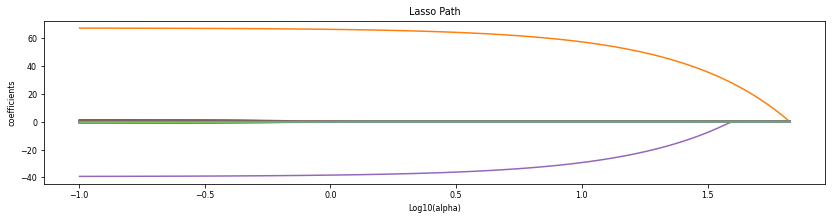

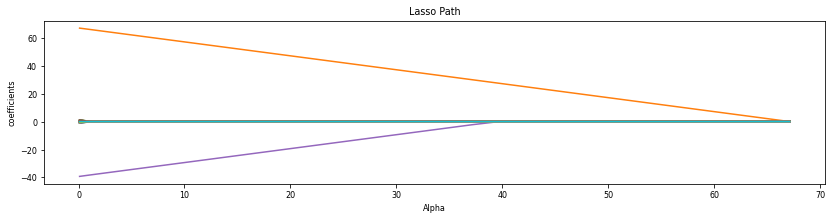

In [33]:
# Display results
# note: alphas/lambda are more handy to illustrate on the log scale 
# log scale compresses larger penalty values and smoothens the path (most textbooks use it)
# it might be also easier to see which values should be in the range for our future tuning

# however, this rescaling is just for cosmetic issues, it does not influence the estimations, so you can decide how it is more convenient for you
# if you are confused by log10 scale, you can simply plot raw penalty values (see the code below)
plt.figure()
log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    l1 = plt.plot(log_alphas_lasso, coef_l)

plt.xlabel('Log10(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Path')
plt.axis('tight')
plt.show()

# path with raw (rather than log-ed lambda values)
# we can still see when ALL coefficients turn to zero (lambda around 800)
# but now it is much harder to see when MOST coefficents turn to zero. 

plt.figure()
for coef_l in coefs_lasso:
    l1 = plt.plot(alphas_lasso, coef_l)

plt.xlabel('Alpha')
plt.ylabel('coefficients')
plt.title('Lasso Path')
plt.axis('tight')
plt.show()

# Source of this code
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html#sphx-glr-auto-examples-linear-model-plot-lasso-coordinate-descent-path-py

In [34]:
# logspace takes us back from log10(lambda/alpha) to raw values
# https://numpy.org/doc/stable/reference/generated/numpy.logspace.html
np.logspace(0, 3, 100)

array([   1.        ,    1.07226722,    1.149757  ,    1.23284674,
          1.32194115,    1.41747416,    1.51991108,    1.62975083,
          1.7475284 ,    1.87381742,    2.009233  ,    2.15443469,
          2.3101297 ,    2.47707636,    2.65608778,    2.84803587,
          3.05385551,    3.27454916,    3.51119173,    3.76493581,
          4.03701726,    4.32876128,    4.64158883,    4.97702356,
          5.33669923,    5.72236766,    6.13590727,    6.57933225,
          7.05480231,    7.56463328,    8.11130831,    8.69749003,
          9.32603347,   10.        ,   10.72267222,   11.49756995,
         12.32846739,   13.21941148,   14.17474163,   15.19911083,
         16.29750835,   17.475284  ,   18.73817423,   20.09233003,
         21.5443469 ,   23.101297  ,   24.77076356,   26.56087783,
         28.48035868,   30.53855509,   32.74549163,   35.11191734,
         37.64935807,   40.37017259,   43.28761281,   46.41588834,
         49.77023564,   53.36699231,   57.22367659,   61.35907

In [35]:
from sklearn.linear_model import LassoCV
import time

y = df['y']
X = df.iloc[:, 0:col]
X = pd.DataFrame(np.ascontiguousarray(X.values), columns=X.columns)

#Note: right now as we have a small dataset, I ran the cross-validation to find the penalty using full sample. 
#Ideally: you would like to keep your test data as untouched as possible. 
#You could either use train data for this cross-validation exercise or (what is even better) to have a separate (so called validation) sample, which would be used only for finding the proper value of the penalty. 

#You can uncomment this line and use train sample only to find the penalty value
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

pipe = Pipeline([('scaler', StandardScaler()),
                 ('lassocv', LassoCV(cv=10, max_iter=10000, alphas=np.logspace(0, 3, 100), fit_intercept=True))])

print("Computing Lasso CV...")
t1 = time.time()
pipe.fit(X, y)
t_cv = time.time() - t1
print("Ready")

Computing Lasso CV...
Ready


In [36]:
l = pipe.named_steps.lassocv #the output of lassocv step is stored here
print("Optimal alpha = % .4f " % l.alpha_)
print("Training time = % .4fs " % t_cv)

Optimal alpha =  1.0000 
Training time =  1.0452s 


(-0.15000000000000013, 3.15, 4214.430069676051, 11711.357092028358)

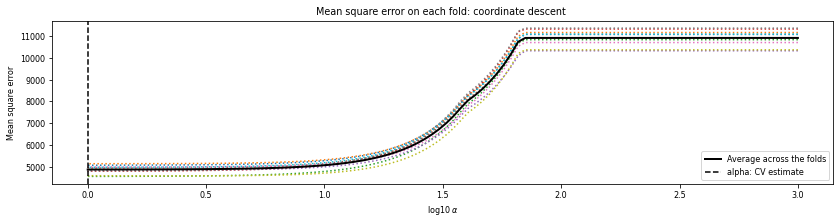

In [37]:
# Display results
log_alphas_lasso = np.log10(l.alphas_)

plt.figure()
plt.plot(log_alphas_lasso , l.mse_path_, ':')
plt.plot(log_alphas_lasso , l.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(np.log10(l.alpha_) , linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel(r'log10 $\alpha$')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent ')
plt.axis('tight')

In [38]:
# We can compare this result with alpha selected using BIC/AIC criterion
from sklearn.linear_model import  LassoLarsIC

model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_
print("Ready")
print("Optimal alpha aic = % .6f " % alpha_aic_)
print("Optimal alpha bic = % .6f " % alpha_bic_)
print("Training time = % .4fs " % t_bic)

Ready
Optimal alpha aic =  0.008985 
Optimal alpha bic =  0.008985 
Training time =  0.1003s 


In [39]:
# estimating out of sample fit with CV-selected penalty value

y = df['y']
X = df.iloc[:, 0:col]
X = pd.DataFrame(np.ascontiguousarray(X.values), columns=X.columns)

kf = KFold(n_splits=5, shuffle=True, random_state=1)

pipe = Pipeline([('scaler', StandardScaler()),
                 ('lasso', 
                  Lasso(alpha=l.alpha_, fit_intercept=True, normalize=False, copy_X=False, max_iter=10000))])
scores_lasso_opt = cross_val_score(pipe, X, y, cv=kf)
print(scores_lasso_opt)
print("Accuracy: %0.5f (+/- %0.5f)" % (scores_lasso_opt.mean(), scores_lasso_opt.std() * 2))


[0.56328894 0.54158266 0.54790275 0.56706956 0.54929479]
Accuracy: 0.55383 (+/- 0.01940)


In [40]:
# estimating out of sample fit with aic-selected penalty value

y = df['y']
X = df.iloc[:, 0:col]
X = pd.DataFrame(np.ascontiguousarray(X.values), columns=X.columns)

kf = KFold(n_splits=5, shuffle=True, random_state=1)

pipe = Pipeline([('scaler', StandardScaler()),
                 ('lasso', 
                  Lasso(alpha=alpha_aic_, fit_intercept=True, normalize=False, copy_X=False, max_iter=10000))])
scores_lasso_aic = cross_val_score(pipe, X, y, cv=kf)
print(scores_lasso_aic)
print("Accuracy: %0.5f (+/- %0.5f)" % (scores_lasso_aic.mean(), scores_lasso_aic.std() * 2))


[0.5620222  0.53863944 0.54434808 0.56539589 0.54768362]
Accuracy: 0.55162 (+/- 0.02069)


Text(0.5, 1.0, 'Out-of-sample validation')

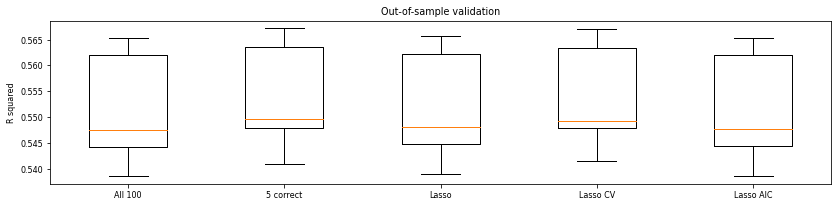

In [41]:
fig, ax = plt.subplots()
ax.boxplot([scores_full, scores_reduced, scores_lasso, scores_lasso_opt, scores_lasso_aic])
plt.xticks([1, 2, 3, 4, 5], ['All 100', '5 correct', 'Lasso', 'Lasso CV', 'Lasso AIC'])
plt.ylabel('R squared')
plt.title('Out-of-sample validation')

In [42]:
y = df['y']
X = df.iloc[:, 0:col]
X = pd.DataFrame(np.ascontiguousarray(X.values), columns=X.columns)

kf = KFold(n_splits=5, shuffle=True, random_state=1)

pipe = Pipeline([('scaler', StandardScaler()),
                 ('lasso', 
                  Lasso(alpha=l.alpha_, fit_intercept=True, normalize=False, copy_X=False, max_iter=10000))])


pipe.fit(X_train, y_train)

pipe['lasso'].coef_

# we can see that while our out-of-sample prediction is great, we are far from capturing the true coefficients. 

array([-0.00000000e+00,  6.58607139e+01, -0.00000000e+00,  0.00000000e+00,
       -3.81895617e+01,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        8.22332152e-02,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  4.91475476e-01, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.84652578e-01,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -3.26190361e-01,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  1.53181283e-01,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -3.06620949e-01,  1.94655806e-01,
       -0.00000000e+00,  

In [43]:
cf= pd.DataFrame(pipe['lasso'].coef_)
cf['vars'] = list(df.iloc[:, 0:col].columns)
cf.loc[cf[0]!=0]
# note that our x's were standardized before running the regression, take it into account when evaluating whether lasso got 
# the coefficients correctly 

,0,vars
1,65.860714,x2
4,-38.189562,x5
8,0.082233,x9
13,0.491475,x14
17,0.184653,x18
27,-0.326190,x28
35,0.153181,x36
50,-0.306621,x51
51,0.194656,x52
72,0.158223,x73


<AxesSubplot:title={'center':'Ordered p-values'}, xlabel='Coefficients'>

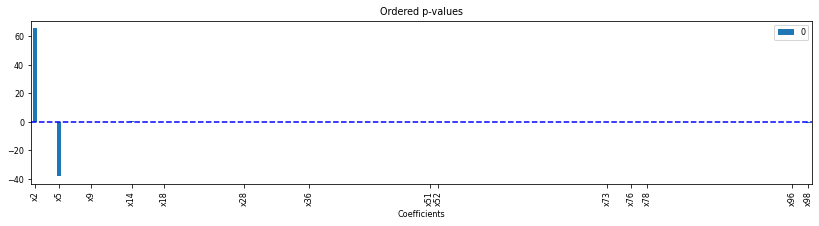

In [44]:
matplotlib.rcParams.update({'font.size': 8, 'figure.figsize': (14, 3)})
ax = cf.loc[cf[0]!=0].plot.bar(title = "Ordered p-values")
ax.set(xlabel="Coefficients", ylabel="", xticklabels = cf.loc[cf[0]!=0].vars)
ax.axhline(0.0, color='b', linestyle='--')
ax

In [24]:
# The advantage of own data is that we can experiment by changing the number of observations, number of parameters, noise of our outcome. 
# When does Lasso's performance becomes better than that of a simple OLS? 
# You can spend some time to play with data and explore the results. 
# You can also try simulating different scales of X's (e.g. define different means and standard deviations) to see the role of normalization. 

# Tutorial 3: Part 1 'Model Regularisation'

Our task is to predict the success of Donald Trump's tweets as measured by the favorite count (outcome). 
Our dataset includes tweet-level data with some information about each tweet: timestamp, length. In addition, I used LDA (latent dirichlet allocation) to identify 100 latent 'topics' (components) from tweets' text. Thus, we also have some signals about the contents of each tweet. You can think of covariates lda_topic_0- lda_topic_100 as of weights that correspond to different topics. For ex.: lda_topic_0 could be _foreign policy_, lda_topic_5 - _immigration_, etc. The value of this covariate (between 0 and 1) means the probability that a given tweet concerns this topic. You will learn more about LDA approach in the next lectures. 

1. Fit an ordinary linear regression on the whole sample. Which covariates would you add? What is in and out-of-sample $R^2$? 
2. Now let's estimate the model using lasso

    2.1 Use the full sample to find lasso regularisation path and have a better idea for our candidate models 
    
    2.2 Use validation sample to select the 'best' $\lambda$ using K-fold cross-validation. Plot average out-of-sample $MSE$ as a function of $\lambda$. 
    
    2.3 Compare the results with AIC/BIC criteria. 
    
3. Use data (without the validation sample) to compare out-of-sample performance between OLS and Lasso

In [45]:
data = pd.read_csv("Data/tweets_lda.csv")
data.shape

(45539, 110)

In [46]:
df = data.copy()
df.describe()

,id_str,retweet_count,favorite_count,year,month,dayofyear,dayofweek,hour,length,lda_topic_0,...,lda_topic_90,lda_topic_91,lda_topic_92,lda_topic_93,lda_topic_94,lda_topic_95,lda_topic_96,lda_topic_97,lda_topic_98,lda_topic_99
count,4.553900e+04,45539.000000,45539.000000,45539.000000,45539.000000,45539.000000,45539.000000,45539.000000,45539.000000,45539.000000,...,45539.000000,45539.000000,45539.000000,45539.000000,45539.000000,45539.000000,45539.000000,45539.000000,45539.000000,45539.000000
mean,7.284901e+17,7902.219175,25546.173741,2015.846988,6.462549,181.135115,2.749248,12.946310,137.711302,0.007546,...,0.008139,0.008128,0.012636,0.007836,0.008656,0.008580,0.013430,0.010131,0.008806,0.010735
std,3.512493e+17,12043.921277,47512.449340,2.674487,3.506796,106.811303,1.916522,5.679015,160.694763,0.042957,...,0.042186,0.044427,0.060078,0.040547,0.045059,0.043605,0.064314,0.052123,0.045456,0.054446
min,1.698309e+09,0.000000,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000726,...,0.000431,0.000431,0.000714,0.000431,0.000431,0.000714,0.000737,0.000431,0.000714,0.000431
25%,4.174620e+17,37.000000,14.000000,2013.000000,3.000000,87.000000,1.000000,8.000000,92.000000,0.002292,...,0.002291,0.002292,0.002298,0.002293,0.002293,0.002293,0.002298,0.002293,0.002293,0.002297
50%,6.677116e+17,1492.000000,131.000000,2015.000000,7.000000,182.000000,3.000000,13.000000,130.000000,0.002539,...,0.002541,0.002540,0.002552,0.002543,0.002543,0.002544,0.002552,0.002544,0.002544,0.002548
75%,1.103430e+18,13215.000000,41293.500000,2019.000000,10.000000,278.500000,4.000000,17.000000,139.000000,0.002951,...,0.002958,0.002955,0.002991,0.002963,0.002965,0.002966,0.002995,0.002967,0.002965,0.002974
max,1.262024e+18,369530.000000,879647.000000,2020.000000,12.000000,366.000000,6.000000,23.000000,20406.000000,0.794605,...,0.791293,0.793503,0.815971,0.779946,0.805854,0.778821,0.791076,0.818324,0.815091,0.811711


In [47]:
# take logs of favorite_count and length, generate a squared term for log_length
for x in ['favorite_count', 'length']:
    df[x] = np.log(df[x]+1)
    
df['length_sq'] = df.length**2


In [48]:
# create dummies for categorical variables: year, month, dayofyear, dayofweek, hour
# i.year i.dayofweek ...
dummies = [pd.get_dummies(df[i], prefix=i, drop_first = True) for i in ['year', 'dayofyear', 'dayofweek', 'hour']]

# We will not use it in the lecture, but you can also add (polynomial) interaction terms
# Sklearn has a useful feature for that
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures


In [51]:
# define your y and X

y = df['favorite_count']
X = df.iloc[:, 9:].join(dummies)
X.head()
#X_short = data[['length', 'length2']].join(dummies) #covariates without LDA components

,length,lda_topic_0,lda_topic_1,lda_topic_2,lda_topic_3,lda_topic_4,lda_topic_5,lda_topic_6,lda_topic_7,lda_topic_8,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,4.653960,0.002966,0.002966,0.002966,0.002966,0.002966,0.002966,0.002966,0.002966,0.002966,...,0,0,0,0,0,0,0,0,0,0
1,4.521789,0.002926,0.002926,0.002926,0.002926,0.002926,0.002926,0.002926,0.002926,0.002926,...,0,0,0,0,0,0,0,0,0,0
2,4.605170,0.003222,0.003222,0.003222,0.003222,0.003222,0.003222,0.356749,0.003222,0.003222,...,0,0,0,0,0,0,0,0,0,0
3,4.948760,0.002707,0.002707,0.002707,0.002707,0.002707,0.002707,0.002707,0.002707,0.002707,...,0,0,0,0,0,0,0,0,0,0
4,4.330733,0.002754,0.002754,0.002754,0.002754,0.002754,0.002754,0.002754,0.002754,0.002754,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# OLS with full sample
est = sm.OLS(y, X).fit()
X = sm.add_constant(X)
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     62.20
Date:                Thu, 28 Oct 2021   Prob (F-statistic):               0.00
Time:                        09:53:36   Log-Likelihood:            -1.1774e+05
No. Observations:               45539   AIC:                         2.365e+05
Df Residuals:                   45032   BIC:                         2.409e+05
Df Model:                         506                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
length           -4.9632      0.220    -22.560      0.000      -5.394      -4.532
lda_topic_0      10.5202      0.869     12.104      0.000       8.817      12.224
lda_topic_1      12.1287      0.855     14.193      0.000      10.454      13.804
lda_topic_2      11.6201      0.852     13.642      0.000       9.951      13.290
lda_topic_3      10.4108      0.885     11.762      0.000       8.676      12.146
lda_topic_4      10.6945      0.815     13.123      0.000       9.097      12.292
lda_topic_5      11.3141      0.830     13.633      0.000       9.687      12.941
lda_topic_6      10.4400      0.805     12.970      0.000       8.862      12.018
lda_topic_7      10.6724      0.858     12.436      0.000       8.990      12.354
lda_topic_8       9.8028      0.858     11.422      0.000       8.121      11.485
lda_topic_9       9.8191      0.836     11.742      0.000       8.180      11.458
lda_topic_10     10.4417      0.857     12.188      0.000       8.762      12.121
lda_topic_11     12.5276      0.847     14.784      0.000      10.867      14.189
lda_topic_12     11.1062      0.864     12.848      0.000       9.412      12.801
lda_topic_13     11.7009      0.837     13.986      0.000      10.061      13.341
lda_topic_14     10.2131      0.883     11.567      0.000       8.483      11.944
lda_topic_15      9.8469      0.877     11.225      0.000       8.127      11.566
lda_topic_16     12.0642      0.871     13.856      0.000      10.358      13.771
lda_topic_17     10.0791      0.839     12.007      0.000       8.434      11.724
lda_topic_18      8.3787      0.872      9.611      0.000       6.670      10.087
lda_topic_19     11.9995      0.834     14.381      0.000      10.364      13.635
lda_topic_20     12.0670      0.864     13.967      0.000      10.374      13.760
lda_topic_21     10.2745      0.850     12.092      0.000       8.609      11.940
lda_topic_22      8.1512      0.805     10.132      0.000       6.574       9.728
lda_topic_23     11.7611      0.839     14.023      0.000      10.117      13.405
lda_topic_24     11.2310      0.826     13.593      0.000       9.612      12.850
lda_topic_25     12.5183      0.831     15.065      0.000      10.890      14.147
lda_topic_26     10.4788      0.857     12.234      0.000       8.800      12.158
lda_topic_27     10.4918      0.857     12.237      0.000       8.811      12.172
lda_topic_28     10.8853      0.883     12.326      0.000       9.154      12.616
lda_topic_29     12.2441      0.855     14.314      0.000      10.567      13.921
lda_topic_30      8.9618      0.863     10.379      0.000       7.269      10.654
lda_topic_31     11.0937      0.854     12.987      0.000       9.419      12.768
lda_topic_32     12.8821      0.837     15.397      0.000      11.242      14.522
lda_topic_33     12.1226      0.852     14.224   

In [52]:
# Running a linear regression model 

from sklearn.preprocessing import StandardScaler # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
from sklearn.pipeline import Pipeline # https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

y = df['favorite_count']
X = df.iloc[:, 9:].join(dummies)
X = pd.DataFrame(np.ascontiguousarray(X.values), columns=X.columns) #Fotran array to save memory and improve computation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # in real applications, try to use as much training data as possible - 80%/20% or 90%/10%

pipe = Pipeline([('scaler', StandardScaler()), 
                 ('regr', LinearRegression(fit_intercept = True, normalize=False, copy_X=False, n_jobs=-1))])
# The pipeline can be used with any other estimator
# It avoids leaking the test set into the train set

pipe.fit(X_train, y_train)
print('In-sample Rsq: % .4f'
     % pipe.score(X_train, y_train))
print('Out-of-sample Rsq: % .4f'
     % pipe.score(X_test, y_test))

In-sample Rsq:  0.4160
Out-of-sample Rsq:  0.3847


In [55]:
## Lasso regression
from sklearn.linear_model import Lasso

# alpha is set at 0.05 (arbitrary)

y = df['favorite_count']

# it is recommended to drop the reference category
dummies = [pd.get_dummies(df[i], prefix=i, drop_first = False) for i in ['year', 'dayofyear', 'dayofweek', 'hour']]

X = df.iloc[:, 9:].join(dummies)
X = pd.DataFrame(np.ascontiguousarray(X.values), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
pipe = Pipeline([('scaler', StandardScaler()), # out of curiousity you can comment out StandardScaler() and see what happens with the performance
                 ('lasso', 
                  Lasso(alpha=0.05, fit_intercept=True, normalize=False, copy_X=False, max_iter=10000))])
# note alpha == lambda in the lecture notes; we just take some value - it is not the optimal! 
# again if you simply follow the defaults, it is not necessary to specify the options
pipe.fit(X_train, y_train)
print('In-sample Rsq: % .4f'
     % pipe.score(X_train, y_train))
print('Out-of-sample Rsq: % .4f'
     % pipe.score(X_test, y_test))
#print(regr.coef_)

In-sample Rsq:  0.3753
Out-of-sample Rsq:  0.3583


In [58]:
from sklearn.linear_model import lasso_path, enet_path

y = df['favorite_count']
X = df.iloc[:, 9:].join(dummies)
X = pd.DataFrame(np.ascontiguousarray(X.values), columns=X.columns)
X = StandardScaler().fit_transform(X) 

# Compute paths
eps = 0.0015 #the smaller it is the longer is the path; 0 = OLS. If it is very small: the model might not find a solution
print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps, max_iter=10000, fit_intercept=True)
print("Ready")

Computing regularization path using the lasso...
Ready


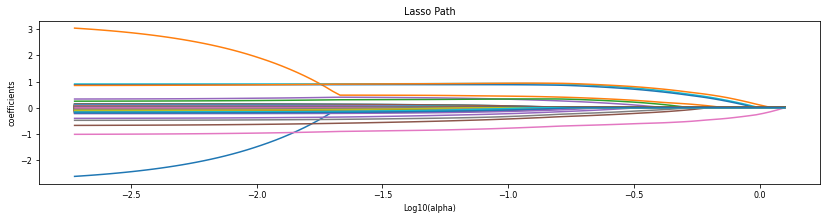

In [59]:
# Display results
plt.figure()
log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    l1 = plt.plot(log_alphas_lasso, coef_l)

plt.xlabel('Log10(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Path')
plt.axis('tight')
plt.show()

# what if we do not standardise covariates, how will the lasso path look like? 
# try to comment out the StandardScaler() and see how the path looks

# https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html#sphx-glr-auto-examples-linear-model-plot-lasso-coordinate-descent-path-py

In [60]:
### Selecting optimal $\lambda$ with CV and grid search 

In [61]:
# We can now be 'good citizens' and get a validation sample, which will be only used for selecting the best penalty value
#_tt train and test data; _val - validation sample, 10% about 4,5K observations
y = df['favorite_count']
X = df.iloc[:, 9:].join(dummies)
X = pd.DataFrame(np.ascontiguousarray(X.values), columns=X.columns)

X_tt, X_val, y_tt, y_val = train_test_split(X, y, test_size=0.1, random_state=1)
y_val

5238     11.446807
33637     2.833213
23678     7.811163
26217     2.995732
42704     3.496508
           ...    
9945     11.304757
4230      0.000000
35417     1.791759
19059     0.000000
3315     11.596181
Name: favorite_count, Length: 4554, dtype: float64

In [62]:
# Use K-fold out-of-sample validation to select the 'best' $\lambda$. Plot average out-of-sample error as a function of $\lambda$. 
# Note: can take some time
from sklearn.linear_model import LassoCV
import time

pipe = Pipeline([('scaler', StandardScaler()),
                 ('lassocv', LassoCV(cv=10, max_iter=10000, alphas=np.logspace(-2.2, -0.5, 100), fit_intercept=True))])

print("Computing Lasso CV...")
t1 = time.time()
pipe.fit(X_val, y_val)
t_cv = time.time() - t1
print("Ready")

Computing Lasso CV...
Ready


In [63]:
l = pipe.named_steps.lassocv #the output of lassocv step is stored here
print("Optimal alpha = % .4f " % l.alpha_)
print("Training time = % .4fs " % t_cv)

Optimal alpha =  0.0493 
Training time =  8.7322s 


(-2.285, -0.415, 10.002170753522497, 14.025907015016973)

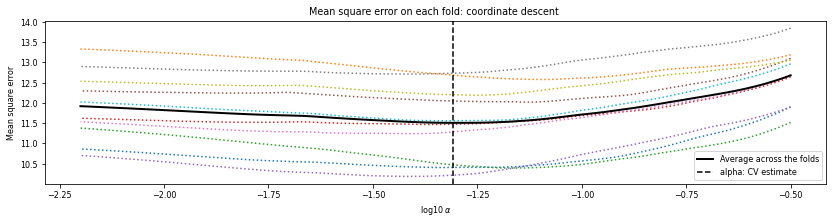

In [64]:
# Display results
log_alphas_lasso = np.log10(l.alphas_)

plt.figure()
plt.plot(log_alphas_lasso , l.mse_path_, ':')
plt.plot(log_alphas_lasso , l.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(np.log10(l.alpha_) , linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel(r'log10 $\alpha$')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent ')
plt.axis('tight')

In [65]:
# We can compare this result with alpha selected with BIC/AIC criterion
from sklearn.linear_model import  LassoLarsIC

model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X_val, y_val)
alpha_aic_ = model_aic.alpha_
print("Ready")
print("Optimal alpha aic = % .6f " % alpha_aic_)
print("Optimal alpha bic = % .6f " % alpha_bic_)
print("Training time = % .4fs " % t_bic)

Ready
Optimal alpha aic =  0.001367 
Optimal alpha bic =  0.000315 
Training time =  1.3847s 


In [66]:
# Estimating out-of-sample performance with cross-validation (we use our data without validation sample)
# Alternatively: could have done sample splitting, fitted the data on the train dataset and measured out-of-sample performance on test dataset

kf = KFold(n_splits=5, shuffle=True, random_state=1)

pipe = Pipeline([('scaler', StandardScaler()),
                 ('lasso', 
                  Lasso(alpha=l.alpha_, fit_intercept=True, normalize=False, copy_X=False, max_iter=10000))])
scores_lasso_opt = cross_val_score(pipe, X_tt, y_tt, cv=kf)
print(scores_lasso_opt)
print("Accuracy: %0.5f (+/- %0.5f)" % (scores_lasso_opt.mean(), scores_lasso_opt.std() * 2))

# if you decide to check for AIC, will take time, as lambda is very small, the result will be very close to a simple OLS

[0.37099811 0.37092367 0.36006757 0.36313142 0.38064667]
Accuracy: 0.36915 (+/- 0.01435)


In [67]:
# Estimating out-of-sample performance with cross-validation (we use our data without validation sample)
# using AIC selected alpha, # takes much time as alpha is much smaller 
kf = KFold(n_splits=5, shuffle=True, random_state=1)

pipe = Pipeline([('scaler', StandardScaler()),
                 ('lasso', 
                  Lasso(alpha=alpha_aic_, fit_intercept=True, normalize=False, copy_X=False, max_iter=10000))])
scores_lasso_aic = cross_val_score(pipe, X_tt, y_tt, cv=kf)
print(scores_lasso_aic)
print("Accuracy: %0.5f (+/- %0.5f)" % (scores_lasso_aic.mean(), scores_lasso_aic.std() * 2))

[0.3976203  0.39334564 0.38901064 0.39513386 0.40687412]
Accuracy: 0.39640 (+/- 0.01189)


In [68]:
# Estimating out-of-sample performance with cross-validation 
# Linear regression 

pipe = Pipeline([('scaler', StandardScaler()), 
                 ('regr', LinearRegression(fit_intercept = True, normalize=False, copy_X=False, n_jobs=-1))])
# The pipeline can be used with any other estimator
# It avoids leaking the test set into the train set

scores_ols = cross_val_score(pipe, X_tt, y_tt, cv=kf)
print(scores_ols)
print("Accuracy: %0.5f (+/- %0.5f)" % (scores_ols.mean(), scores_ols.std() * 2))


[0.39727166 0.39274512 0.38876174 0.39514554 0.40624697]
Accuracy: 0.39603 (+/- 0.01167)


Text(0.5, 1.0, 'Out-of-sample validation')

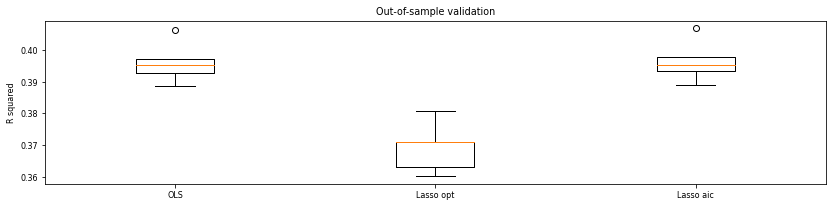

In [70]:
fig, ax = plt.subplots()
ax.boxplot([scores_ols,  scores_lasso_opt, scores_lasso_aic])
plt.xticks([1, 2, 3], ['OLS',  'Lasso opt', 'Lasso aic'])
plt.ylabel('R squared')
plt.title('Out-of-sample validation')

**Why do you think in this case OLS and Lasso (with $\lambda$ selected by AIC) outperformed Lasso with $\lambda$ selected by CV?**

In [ ]:
# As an exercise, you can replicate the estimations but for a much smaller sample
# A way to randomly select only 10% from our sample
data_sm = data.sample(frac=0.1, replace=False, weights=None, random_state=1, axis=0)
data_sm.describe()

## Resources 
* Athey and Imbens (2019) Machine Learning Methods Economists Should Know About
* Matt Taddy (2019) Business Data Science: Combining Machine Learning and Economics to Optimize, Automate, and Accelerate Business Decisions. McGraw-Hill Education
* James/Witten/Hastie/Tibrashini (2021) Introduction to Statistical Learning  https://web.stanford.edu/~hastie/ISLR2/ISLRv2_website.pdf
* [Video lectures on statistical learning](https://www.r-bloggers.com/in-depth-introduction-to-machine-learning-in-15-hours-of-expert-videos/)